In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


2024-06-03 01:13:24.600581: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-03 01:13:24.633382: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 01:13:25.508614: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 01:13:27.269873: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 01:13:29.978917: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

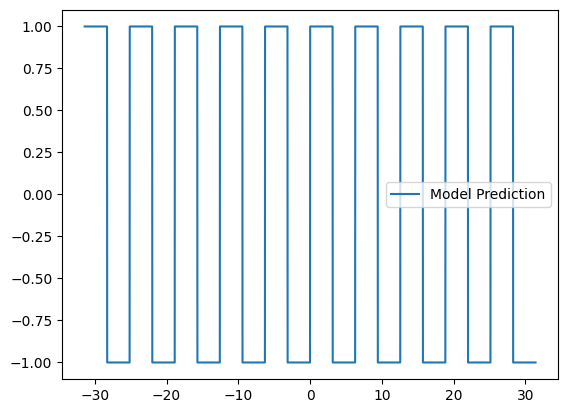

In [2]:


# Generate data
n = 10 
x = np.linspace(-n*np.pi, n*np.pi, 3000)
y = np.sin(x)

y_t = np.vectorize(lambda value: 0 if abs(value) < 0 else 1*abs(value)/value)
f = lambda x: y_t(np.sin(x))

#f = np.sin
y = f(x)

plt.plot(x, y, label='Model Prediction')

plt.legend()
plt.show()

In [3]:
x_train = x
y_train = y

x_test = None
y_test = None


In [4]:

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(x, y, epochs=500, verbose=0)


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step


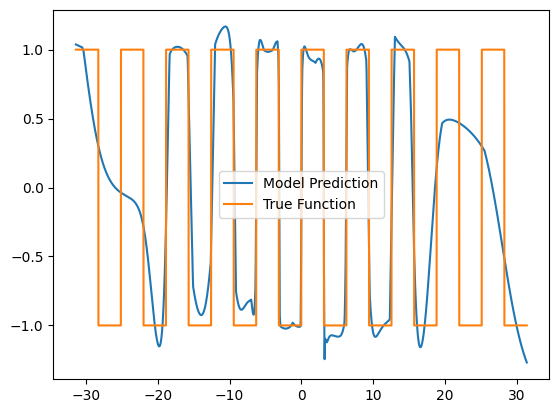

In [5]:

# Test the model
x_pred = x_train
y_pred= model.predict(x_pred)

# Plotting results
plt.plot(x_pred, y_pred, label='Model Prediction')
plt.plot(x_pred, f(x_pred), label='True Function')
plt.legend()
plt.show()


In [6]:
import tensorflow as tf
import numpy as np

# Sinusoidal feature mapping
class FourierLayer(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super(FourierLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='random_normal',
            trainable=True
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='random_normal',
            trainable=True
        )

    def call(self, inputs):
        inputs = tf.expand_dims(inputs, -1)  # Ensure inputs are 2D
        return tf.math.sin(tf.matmul(inputs, self.w) + self.b)

# Define the model
model = tf.keras.Sequential([
    FourierLayer(units=50),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')


# Reshape x_train to be a 2D array
x_train_rs = x_train.reshape(-1, 1)


#history = model.fit(x_train_rs, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose = 0)


In [7]:
y_pred.shape


(3000, 1)

In [8]:
# Test the model
x_pred = x_train
y_pred= model.predict(x_pred).reshape(-1)

# Plotting results
plt.plot(x_pred, y_pred, label='Model Prediction')
plt.plot(x_pred, f(x_pred), label='True Function')
plt.legend()
plt.show()

RuntimeError: Exception encountered when calling FourierLayer.call().

[1mCould not automatically infer the output shape / dtype of 'fourier_layer' (of type FourierLayer). Either the `FourierLayer.call()` method is incorrect, or you need to implement the `FourierLayer.compute_output_spec() / compute_output_shape()` method. Error encountered:

Dimensions must be equal, but are 1 and 32 for '{{node MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](ExpandDims, MatMul/ReadVariableOp)' with input shapes: [32,1], [32,50].[0m

Arguments received by FourierLayer.call():
  • args=('<KerasTensor shape=(32,), dtype=float32, sparse=None, name=keras_tensor_5>',)
  • kwargs=<class 'inspect._empty'>